In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../input/BES/interpreted_seismics/version_1/"
geo_model = gp.create_model("BES_model_seismic_v1")

No module named 'osgeo'


Active grids: ['regular']


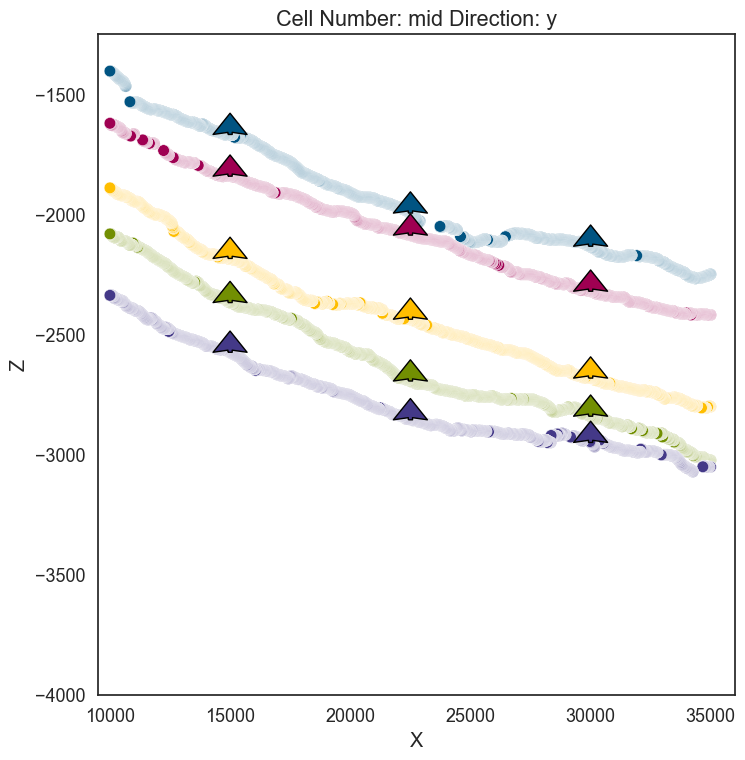

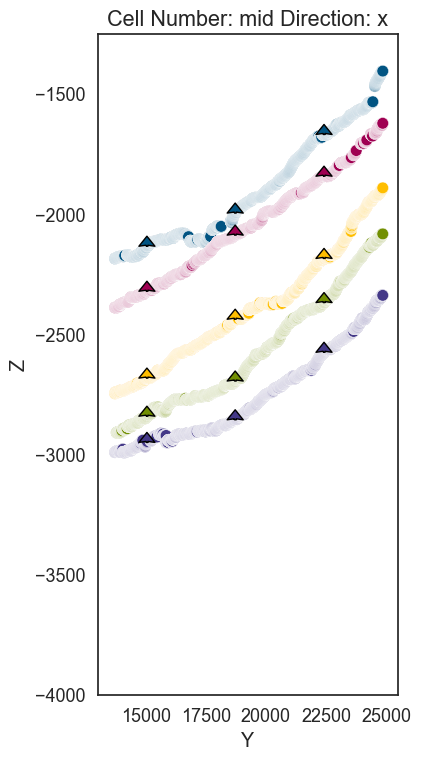

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[9500, 36000, 13000, 25500, -4000, -1250],
    resolution=[50, 50, 50],
    path_i=data_path + "sp_one_seis_rescaled_test.csv",
    path_o=data_path + "orientations_points.csv",
)

# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Sea_floor": ("sea_floor"),
        "Strat_1": ("h1"),
        "Strat_2": ("h2"),
        "Strat_3": ("h3"),
        "Strat_4": ("h4"),
        "Basement": ("basement",),
    },
)

# Seção transversal do modelo
gp.plot_2d(
    geo_model, direction="y", show_data=True, show_lith=True, ve=10, legend=False
)
gp.plot_2d(
    geo_model, direction="x", show_data=True, show_lith=True, ve=10, legend=False
)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [3]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=10,
)

In [5]:
# Interpolating and computing the model

gp.set_interpolator(
    geo_model,
    output=["geology"],
    compile_theano=True,
    theano_optimizer="fast_run",  # fast_compile, fast_run
    dtype="float64",  # for model stability
)

sol = gp.compute_model(geo_model, compute_mesh=True)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                              values
range                  29428.939838
$C_o$               20620535.714286
drift equations  [3, 3, 3, 3, 3, 3]


ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
# Ploting 2D and 3D

# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=10,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=10,
    legend=True,
)

# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=5)

## Step by Step

## Step by step with Rescaled data

In [2]:
df = pd.read_csv(data_path + "sp_one_seis_rescaled_test.csv")

In [3]:
df.describe()

,X,Y,Z
count,8831.000000,8831.000000,8831.000000
mean,22467.790624,18744.589627,-2370.518429
std,7169.289111,3515.010348,388.832567
min,10009.000000,12592.000000,-3071.700000
25%,16280.000000,15718.000000,-2716.750000
50%,22347.000000,18797.000000,-2374.500000
75%,28634.000000,21778.000000,-2097.985000
max,34999.000000,24859.000000,-1405.070000


In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[9500, 36000, 13000, 25500, -3200, -1250],
    resolution=[50, 50, 50],
    path_i=data_path + "sp_one_seis_rescaled_test.csv",
    path_o=data_path + "orientations_points.csv",
)

Active grids: ['regular']


BES_model_seismic_v1  2023-09-19 18:17

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,sea_floor,Default series,1,#015482,1
1,h1,Default series,2,#9f0052,2
2,h2,Default series,3,#ffbe00,3
3,h3,Default series,4,#728f02,4
4,h4,Default series,5,#443988,5
5,basement,Basement,1,#ff3f20,6


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Sea_floor": ("sea_floor"),
        "Strat_1": ("h1"),
        "Strat_2": ("h2"),
        "Strat_3": ("h3"),
        "Strat_4": ("h4"),
        "Basement": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,sea_floor,Sea_floor,1,#015482,1
1,h1,Strat_1,1,#9f0052,2
2,h2,Strat_2,1,#ffbe00,3
3,h3,Strat_3,1,#728f02,4
4,h4,Strat_4,1,#443988,5
5,basement,Basement,1,#ff3f20,6


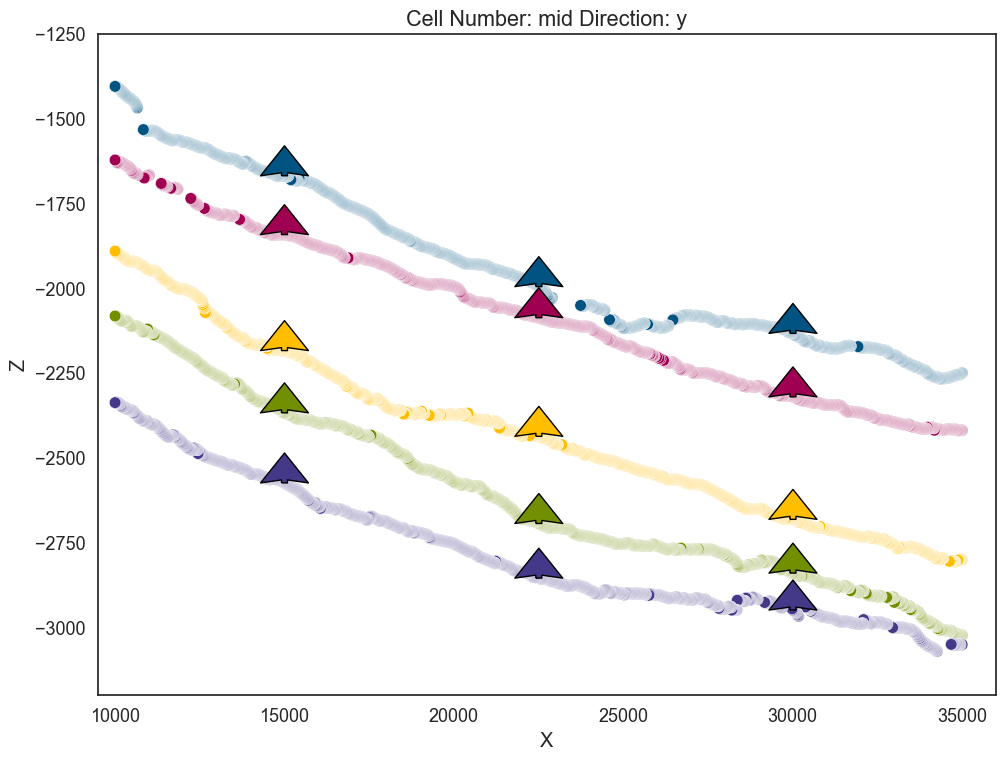

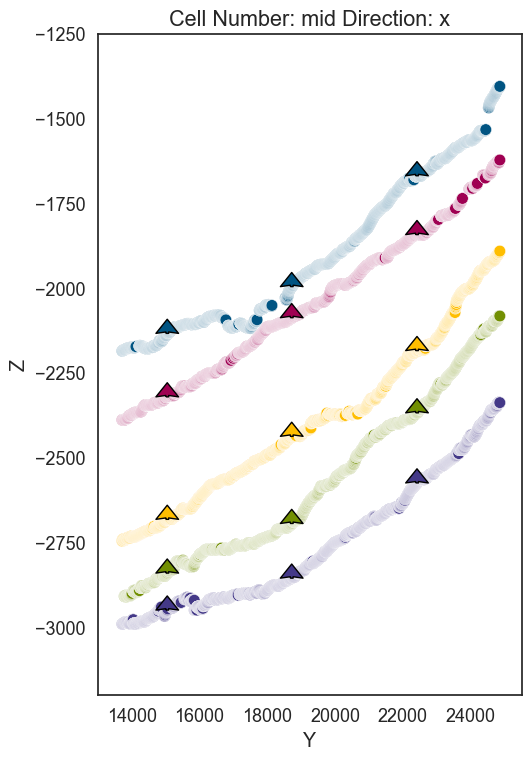

In [5]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model, direction="y", show_data=True, show_lith=True, ve=10, legend=False
)
gp.plot_2d(
    geo_model, direction="x", show_data=True, show_lith=True, ve=10, legend=False
)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [6]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=10,
)

In [7]:
%%time
gp.set_interpolator(
    geo_model, 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                              values
range                  29364.987655
$C_o$               20531011.904762
drift equations  [3, 3, 3, 3, 3, 3]
CPU times: total: 17 s
Wall time: 17.3 s


In [9]:
"""%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)"""

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                              values
range                  29364.987655
$C_o$               20531011.904762
drift equations  [3, 3, 3, 3, 3, 3]
CPU times: total: 16.7 s
Wall time: 17.3 s


In [8]:
%%time
sol=gp.compute_model(geo_model, compute_mesh=True)

ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=10,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=10,
    legend=True,
)

In [ ]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=5)

In [ ]:
"""topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)"""

In [ ]:
"""# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)"""

In [ ]:
"""# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)"""

## Step by step Rescaled Full

In [ ]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 60709, 0, 29733, -3200, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "sp_one_seis_rescaled.csv",
    path_o=data_path + "orientations_points.csv",
)

# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Sea_floor": ("sea_floor"),
        "Strat_1": ("h1"),
        "Strat_2": ("h2"),
        "Strat_3": ("h3"),
        "Strat_4": ("h4"),
        "Basement": ("basement",),
    },
)

# Seção transversal do modelo
gp.plot_2d(
    geo_model, direction="y", show_data=True, show_lith=True, ve=10, legend=False
)
gp.plot_2d(
    geo_model, direction="x", show_data=True, show_lith=True, ve=10, legend=False
)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=10,
)